# Creating a ANN(MLP) model for Human Detection System

In [3]:
!pip install tensorflow

# 1. Import Required Libraries

In [6]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# 2. Set Data Paths

In [9]:
pos_path = "../data/pos_person"
neg_path = "../data/neg_person"

# 3. Prepare the Dataset

In [12]:
X = []
y = []

img_size = (64, 128)

In [14]:
# Load positive (human) images
for file in os.listdir(pos_path):
    img = cv2.imread(os.path.join(pos_path, file), cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    img = cv2.resize(img, img_size)
    X.append(img)
    y.append(1)

In [16]:
# Load negative (non-human) images
for file in os.listdir(neg_path):
    img = cv2.imread(os.path.join(neg_path, file), cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    img = cv2.resize(img, img_size)
    X.append(img)
    y.append(0)

# 4. Convert & Normalize Data

In [21]:
X = np.array(X)
y = np.array(y)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Flatten images
X = X.reshape((X.shape[0], -1))  # Shape becomes (num_samples, 64*128)
print("X shape:", X.shape)

X shape: (6562, 8192)


# 5. Train& Test Split of Dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))

Train samples: 5249
Test samples: 1313


# 6. Build MLP Model

In [27]:
#create Nural Network(or MLP)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,326,401 (16.50 MB)

 Trainable params: 4,326,401 (16.50 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Compile Model

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# 8. Train the Model

In [35]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.6380 - loss: 1.2487 - val_accuracy: 0.7898 - val_loss: 0.4517
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7775 - loss: 0.4821 - val_accuracy: 0.8241 - val_loss: 0.3982
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.8041 - loss: 0.4364 - val_accuracy: 0.8111 - val_loss: 0.4308
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.8188 - loss: 0.4251 - val_accuracy: 0.8324 - val_loss: 0.3880
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.8044 - loss: 0.4136 - val_accuracy: 0.8408 - val_loss: 0.3718
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.8225 - loss: 0.3896 - val_accuracy: 0.8408 - val_loss: 0.3630
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8418 - loss: 0.3822 - val_accuracy: 0.8583 - val_loss: 0.3827
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.8390 - loss: 0.3709 - 

# 9. Evaluate the Model

In [40]:
# Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Confusion Matrix:
[[762  68]
 [109 374]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       830
           1       0.85      0.77      0.81       483

    accuracy                           0.87      1313
   macro avg       0.86      0.85      0.85      1313
weighted avg       0.86      0.87      0.86      1313



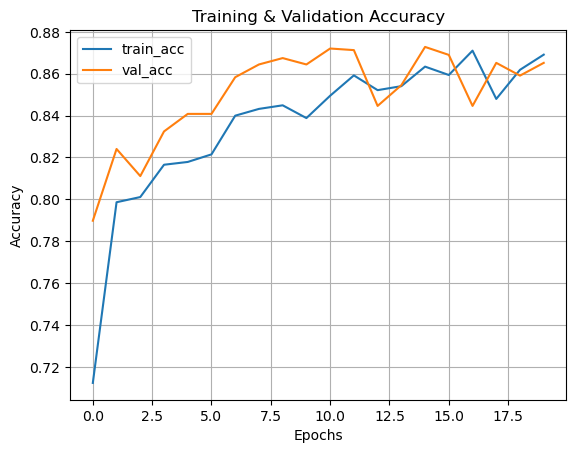

In [42]:
## Accuracy & Validation Accuracy curves
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

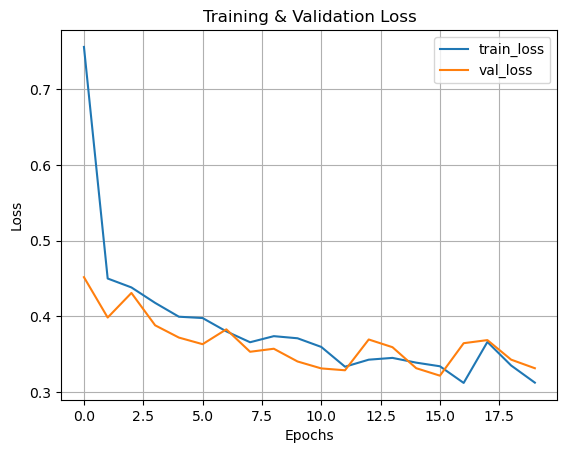

In [44]:
## Loss & val_loss curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 10. Save the Model

In [47]:
model.save("../model/human_detector_ann.h5")
print("Model saved to ../model/human_detector_ann.h5")

Model saved to ../model/human_detector_ann.h5


# 11. Predict on a New Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


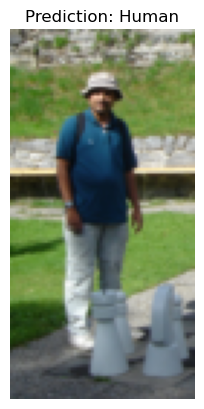

In [50]:
# Define image size (should match training size)
img_size = (64, 128)

# Load the trained ANN model
mlp_model = tf.keras.models.load_model("../model/human_detector_ann.h5")

# Load a test image
test_img_path = "../data/pos_person/crop001037b.png"  
img = cv2.imread(test_img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, img_size)

# Normalize pixel values
img_normalized = img_resized / 255.0

# Flatten and reshape to match model input
img_input = img_normalized.reshape(1, -1)  # shape: (1, 64*128)

# Predict using MLP model
prediction = mlp_model.predict(img_input)
label = "Human" if prediction[0][0] > 0.5 else "Not Human"

# Display image with prediction
img_rgb = cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"Prediction: {label}")
plt.axis("off")
plt.show()

# 12. Predict on Multiple Test Images using MLP Model (ANN)

Processing: 4_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Prediction: Not Human


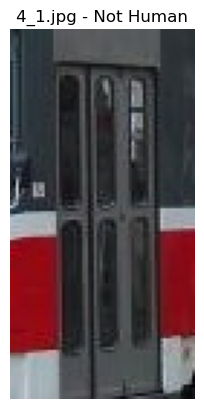

Processing: 6_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Prediction: Not Human


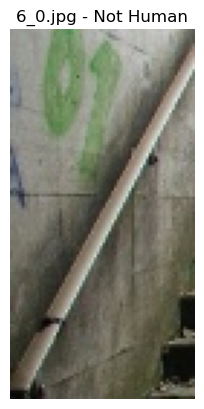

Processing: 6_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Prediction: Not Human


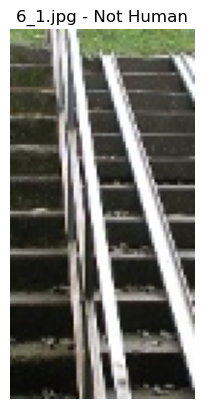

Processing: 6_13.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Prediction: Not Human


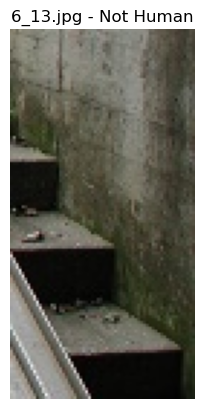

Processing: 6_14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Prediction: Not Human


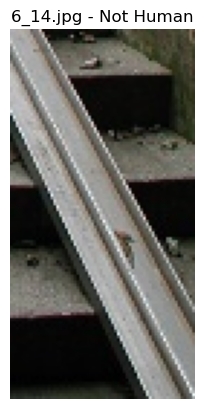

Processing: 7_9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Prediction: Not Human


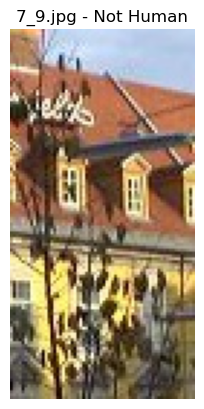

Processing: 9_6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Prediction: Not Human


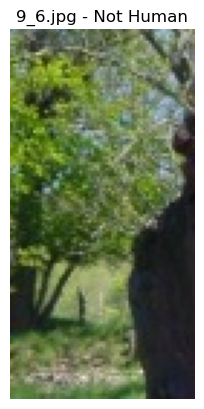

Processing: 00000006a.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Prediction: Not Human


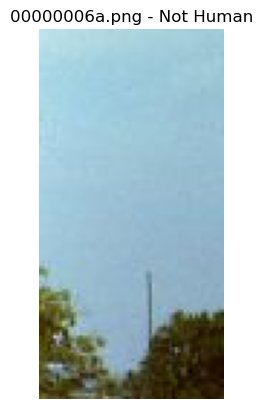

Processing: crop001037b.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Prediction: Human


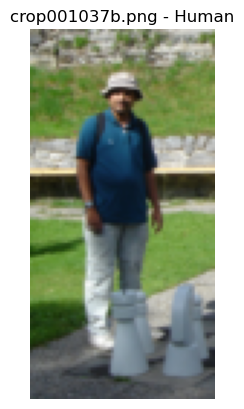

Processing: crop001047a.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Prediction: Human


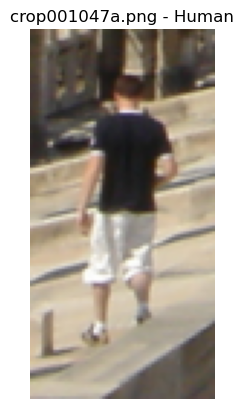

Processing: crop001047b.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediction: Human


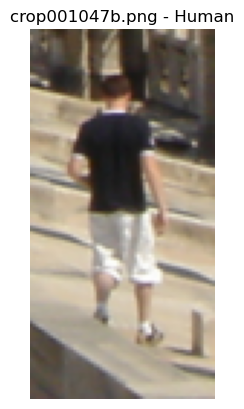

Processing: crop001048a.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Prediction: Human


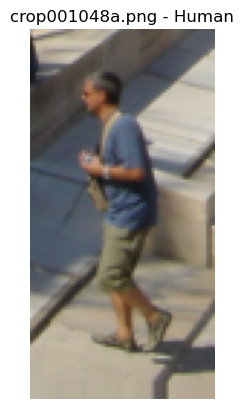

Processing: crop001051a.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Prediction: Human


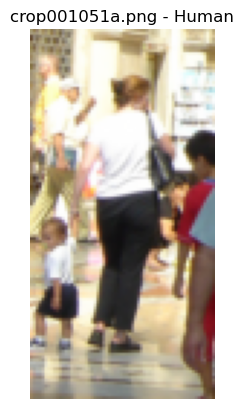

Processing: crop001055b.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Prediction: Human


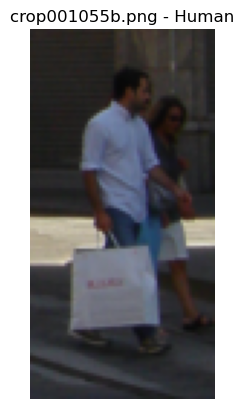

In [54]:
import glob

# Load trained ANN model
mlp_model = tf.keras.models.load_model("../model/human_detector_ann.h5")

# Define input image size (should match what you used during training)
img_size = (64, 128)

# Collect all test image paths
test_image_files = glob.glob("../data/predictTestImages/*.jpg") + \
                   glob.glob("../data/predictTestImages/*.jpeg") + \
                   glob.glob("../data/predictTestImages/*.png")

# Loop through each test image
for image_path in test_image_files:
    print(f"Processing: {os.path.basename(image_path)}")
    
    # Load grayscale image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Failed to load image.")
        continue

    # Resize, normalize, flatten
    img_resized = cv2.resize(img, img_size)
    img_normalized = img_resized / 255.0
    img_input = img_normalized.reshape(1, -1)  # shape: (1, 8192)
    
    # Predict using MLP
    prediction = mlp_model.predict(img_input)
    label = "Human" if prediction[0][0] > 0.5 else "Not Human"
    print(f"Prediction: {label}")
    
    # Show the original image in color (if exists)
    img_color = cv2.imread(image_path)
    if img_color is not None:
        img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f"{os.path.basename(image_path)} - {label}")
        plt.axis("off")
        plt.show()